In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("pdata.csv")

In [2]:
df.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Class
0,1,7,0,28,37,25,14,7,1
1,3,2,31,6,40,27,2,6,1
2,13,8,32,24,14,43,7,13,1
3,2,0,31,20,19,9,15,8,1
4,7,4,10,6,24,2,1,14,1


In [3]:
df.tail()

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Class
12496,0,1,17,91,40,4,1,1,5
12497,7,10,25,77,36,9,9,8,5
12498,1,5,19,2,31,3,2,0,5
12499,2,1,8,22,16,4,3,1,5
12500,4,5,5,28,8,1,3,1,5


In [4]:
df.shape

(12501, 9)

In [5]:
target=df['Class']

In [6]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [7]:
target.value_counts()

Class
4    2501
1    2500
2    2500
3    2500
5    2500
Name: count, dtype: int64

In [8]:
features=df[['Sensor1','Sensor2','Sensor3','Sensor4','Sensor5','Sensor6','Sensor7','Sensor8']]

In [9]:
features.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8
0,1,7,0,28,37,25,14,7
1,3,2,31,6,40,27,2,6
2,13,8,32,24,14,43,7,13
3,2,0,31,20,19,9,15,8
4,7,4,10,6,24,2,1,14


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [11]:
X_train.shape

(10000, 8)

In [12]:
X_test.shape

(2501, 8)

In [13]:
y_test.value_counts()

Class
4    519
3    502
2    497
1    495
5    488
Name: count, dtype: int64

# 1. Logistic Regression

In [14]:
# Importing the LogisticRegression class from the linear_model module in sklearn
from sklearn.linear_model import LogisticRegression
# create object of the above classifier
clf = LogisticRegression(random_state = 0,max_iter = 1000) # pass seed to ensure results are reproducible
clf.fit(X_train, y_train) # calls fit method from the classifier object to fit the data to our model

LogisticRegression(max_iter=1000, random_state=0)

In [15]:
# Importing the confusion_matrix and accuracy_score class from the metrics module in sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
y_pred = clf.predict(X_test) # calls a predict method from the classfier object to target variable of the X_test
# creating a confussion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# model score
accuracy_score(y_test, y_pred)

[[402  36  11  43   3]
 [ 23 395  36  38   5]
 [  6  25 333  85  53]
 [ 20  20 115 338  26]
 [  2   6  95  19 366]]


0.7333066773290684

<Axes: >

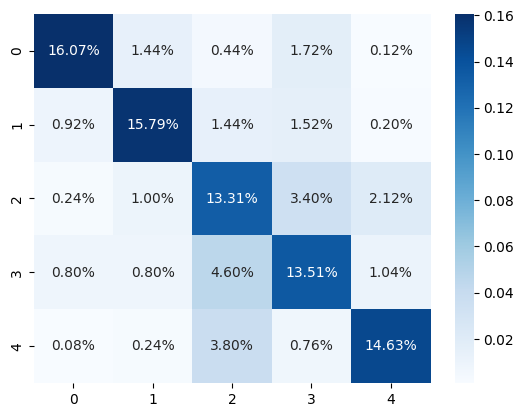

In [16]:
import seaborn as sns
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

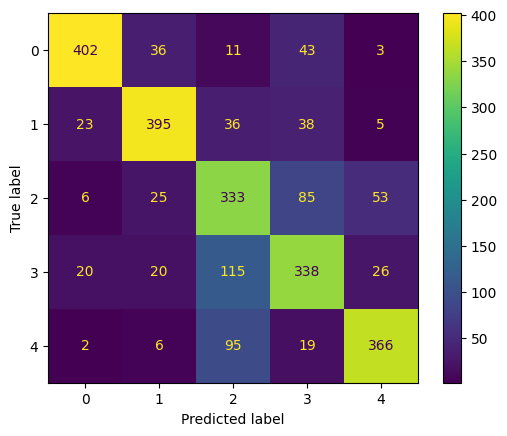

In [17]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [18]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.7435383116122628, 0.7333066773290684, 0.7370422744473678, None)

## Decision Tree

In [19]:
#Import Random Forest Model
from sklearn.tree import DecisionTreeClassifier

#Create a Gaussian Classifier
clf=DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [20]:
# Importing the confusion_matrix and accuracy_score class from the metrics module in sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
y_pred = clf.predict(X_test) # calls a predict method from the classfier object to target variable of the X_test
# creating a confussion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# model score
accuracy_score(y_test, y_pred)

[[325  50  19  99   2]
 [ 20 329  69  79   0]
 [ 20  29 366  62  25]
 [ 15   4 206 277  17]
 [ 16  10 174  42 246]]


0.616953218712515

<Axes: >

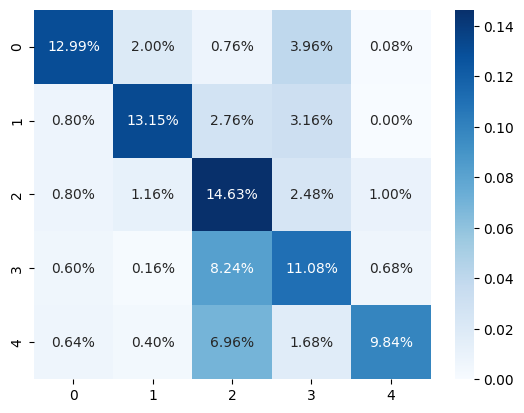

In [21]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

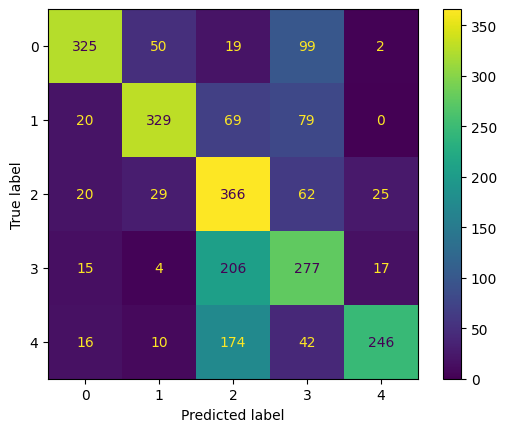

In [22]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [23]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.6737949755380426, 0.616953218712515, 0.6266842234110463, None)

## 3. Random Forest

In [24]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [25]:
# Importing the confusion_matrix and accuracy_score class from the metrics module in sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
y_pred = clf.predict(X_test) # calls a predict method from the classfier object to target variable of the X_test
# creating a confussion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# model score
accuracy_score(y_test, y_pred)

[[422  29   2  39   3]
 [ 25 408  26  37   1]
 [  6  24 350  71  51]
 [ 22  17  76 388  16]
 [  2   4  82  24 376]]


0.7772890843662535

In [26]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.7825445673357716, 0.7772890843662535, 0.7791652963194009, None)

<Axes: >

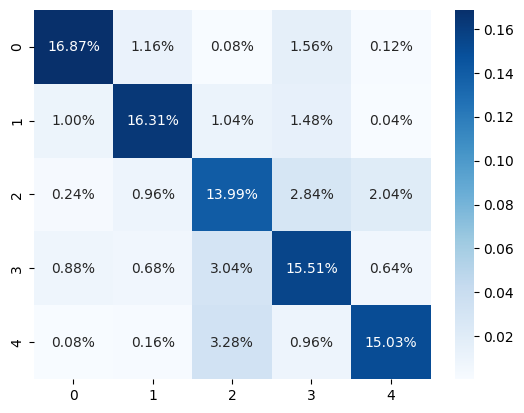

In [27]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

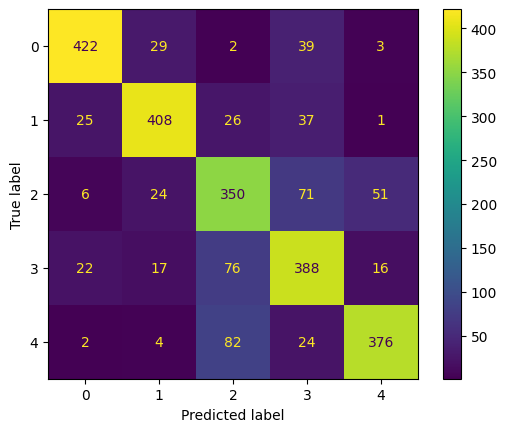

In [28]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [29]:
clf.predict([[1,7,0,28,37,25,14,7]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

## 4. GaussianNB

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# create a GaussianNB Naive Bayes classifier
clf = GaussianNB()

# train the classifier on the training data
clf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = clf.predict(X_test)

# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7065173930427829


<Axes: >

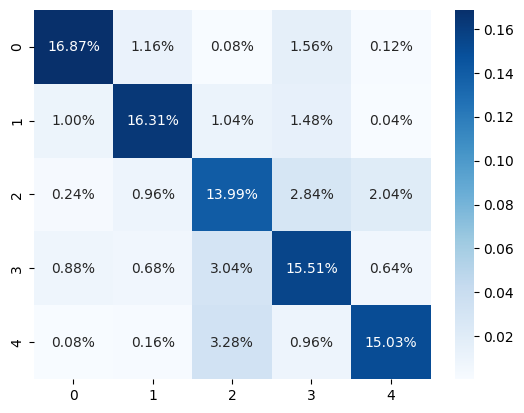

In [31]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

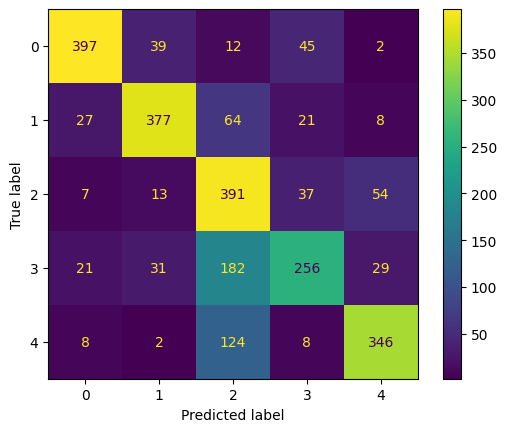

In [32]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [33]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.7330413218991253, 0.7065173930427829, 0.7094802223794829, None)

In [34]:
clf.predict([[0,1,17,91,40,4,1,1]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([5])

In [35]:
clf.predict([[1,7,0,28,37,25,14,7]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([4])

In [36]:
# Importing the confusion_matrix and accuracy_score class from the metrics module in sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
y_pred = clf.predict(X_test) # calls a predict method from the classfier object to target variable of the X_test
# creating a confussion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# model score
accuracy_score(y_test, y_pred)

[[397  39  12  45   2]
 [ 27 377  64  21   8]
 [  7  13 391  37  54]
 [ 21  31 182 256  29]
 [  8   2 124   8 346]]


0.7065173930427829

## Data Analysis

In [37]:
import pandas as pd
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(pd.read_csv("pdata.csv"))

#Saving results to HTML file
sweet_report.show_html('sweet_report.html')

AttributeError: 'DataFrame' object has no attribute 'iteritems'

## 5. SVM

In [38]:
# Importing the LogisticRegression class from the linear_model module in sklearn
from sklearn import svm
# create object of the above classifier
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [39]:
# Importing the confusion_matrix and accuracy_score class from the metrics module in sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
y_pred = clf.predict(X_test) # calls a predict method from the classfier object to target variable of the X_test
# creating a confussion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# model score
accuracy_score(y_test, y_pred)

[[412  33   8  39   3]
 [ 22 399  36  39   1]
 [  5  19 378  61  39]
 [ 19  14 108 352  26]
 [  1   4 103  13 367]]


0.7628948420631747

<Axes: >

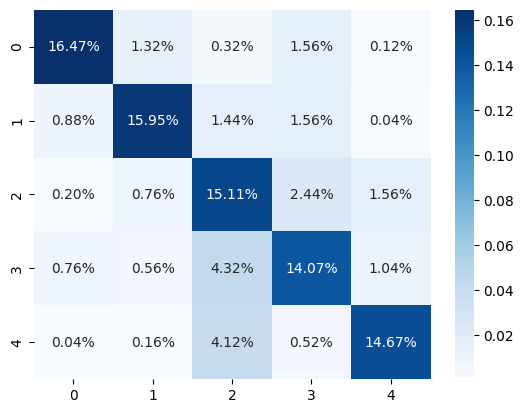

In [40]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

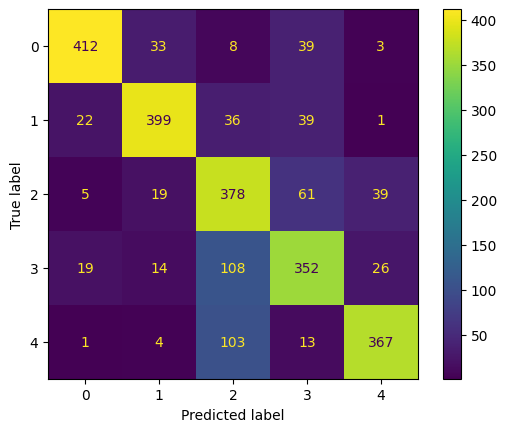

In [41]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [42]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.7757512857012996, 0.7628948420631747, 0.7666130201304622, None)